### 1. 环境准备

In [1]:
!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install xgboost==2.1.3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

### 2. 数据分析




In [4]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[   3.2596    ,   33.        ,    5.0176565 , ...,    3.6918138 ,
          32.71      , -117.03      ],
       [   3.8125    ,   49.        ,    4.47354497, ...,    1.73809524,
          33.77      , -118.16      ],
       [   4.1563    ,    4.        ,    5.64583333, ...,    2.72321429,
          34.66      , -120.48      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]], shape=(16512, 8))

Observation：行记录 = 样本 = Observation  
Feature：列 = 字段 = 特征属性 = Feature

In [7]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


### 3. 数据处理
### 4. 模型训练

In [8]:
n_estimators=100

In [12]:
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf
rf_train_time

8.242911577224731

In [11]:
# Measure training time for XGBoost
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb
xgb_train_time

0.2248079776763916

### 5. 模型评估

In [16]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
rf_pred_time =  time.time() - start_time_rf
rf_pred_time

0.08971905708312988

In [15]:
# Measure prediction time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
xgb_pred_time = time.time() - start_time_xgb
xgb_pred_time

0.0035240650177001953

In [20]:
mse_rf = mean_squared_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
print( mse_rf,r2_rf,mse_xgb, r2_xgb)

0.2225899267544737 0.8047359842513278 0.2558757193644326 0.8301370561019205


计算标准方差

In [22]:
std_y = np.std(y_test)
std_y

np.float64(1.1447309632576992)

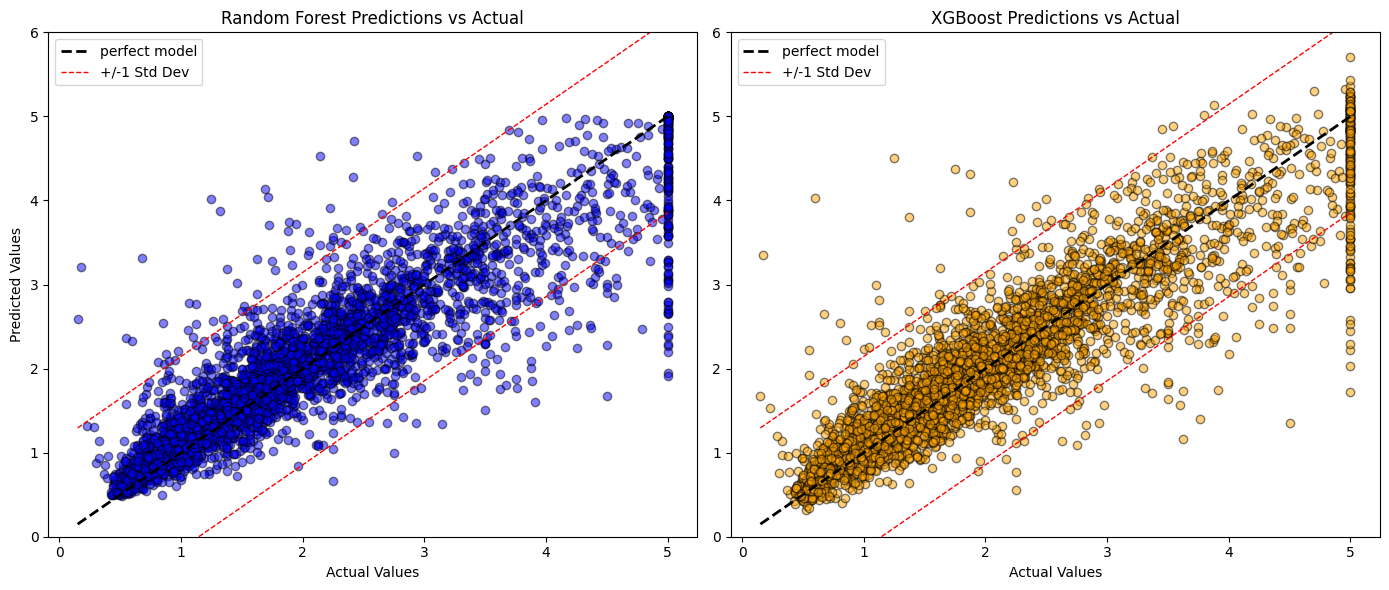

In [23]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()